## Testing notebook

In [1]:
import algorithm as a1
import zdt3
import cf6_4d
import numpy as np
import matplotlib.pyplot as plt
import parsing as p

In [2]:
zdt = zdt3.ZDT3()

In [3]:
cf6 = cf6_4d.CF6()

# Testing

### Base implementation vs NSGAII
Population: 40
Generations: 100

In [127]:
moec = a1.MOEC(40,100,30,0.5,0.7,20)

In [128]:
frente = moec.run()

In [129]:
len(np.unique(frente, axis=0))

27

In [130]:
res_1 = np.array([zdt.func(c)[0] for c in frente])
res_2 = np.array([zdt.func(c)[1] for c in frente])

In [131]:
nsga_x,nsga_y = p.read_plotout("NSGAII_outs/plot_zdt3_1.out")

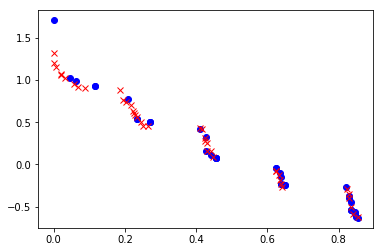

In [132]:
plt.plot(res_1,res_2,'bo')
plt.plot(nsga_x,nsga_y,'rx')
plt.show()

In [9]:
moec.neighbours[0]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

### CF6 without constraint handling
* Population 40
* Generations 100
* Constraint weights: 100,100

In [119]:
m_cf6 = a1.MOEC(40,100,10,0.5,0.5,20,const_mode="penalty",problem=cf6_4d.CF6(),weights=[0.75,0.75])

In [120]:
f_cf6 = m_cf6.run()

In [121]:
res_1 = np.array([cf6.func(c)[0] for c in f_cf6])
res_2 = np.array([cf6.func(c)[1] for c in f_cf6])

In [122]:
p.plot_out(f_cf6,cf6,"1")

In [123]:
nsga_x,nsga_y = p.read_plotout("NSGAII_outs/plot_cf6_1.out")

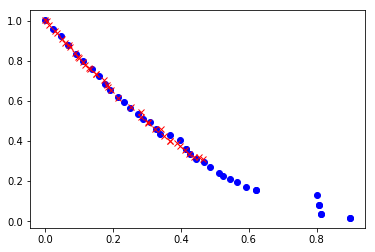

In [124]:
plt.plot(res_1,res_2,'bo')
plt.plot(nsga_x,nsga_y,'rx')
plt.show()

Intento de implementar separación de objetivos fallida. Mi idea es una función que devuelve la suma de las violaciones de restricciones si esta es mayor que cero o la función de tchebycheff si no lo es, de manera que se puedan comparar estas funciones aplicadas por separado a cada solución candidata. El problema es que es posible que una solución tenga menor violacion de restricciones que la otra función de tchebycheff, con lo que la primera es elegida aunque en la heurística de separación de objetivos debiera salir la segunda.

In [125]:
con_1 = np.array([cf6.const(c)[0] for c in f_cf6])
con_2 = np.array([cf6.const(c)[1] for c in f_cf6])

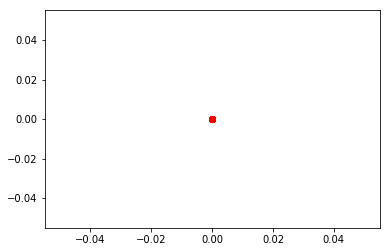

In [126]:
plt.plot(con_1,con_2,'ro')
plt.show()

### CF6 without constraint handling
* Population 80
* Generations 50
* Constraint weights: 100,100

In [22]:
m_cf6_2 = a1.MOEC(80,50,20,0.5,0.5,20,problem=cf6_4d.CF6())

In [23]:
f_cf6_2 = m_cf6_2.run()

In [24]:
res_1 = np.array([cf6.func(c)[0] for c in f_cf6_2])
res_2 = np.array([cf6.func(c)[1] for c in f_cf6_2])

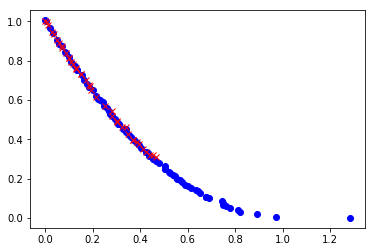

In [25]:
plt.plot(res_1,res_2,'bo')
plt.plot(nsga_x,nsga_y,'rx')
plt.show()

In [26]:
con_1 = np.array([cf6.const(c)[0] for c in f_cf6_2])
con_2 = np.array([cf6.const(c)[1] for c in f_cf6_2])

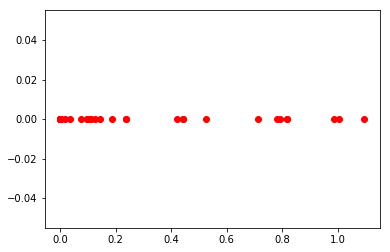

In [27]:
plt.plot(con_1,con_2,'ro')
plt.show()

### CF6 with separation

In [16]:
m_cf6_3 = a1.MOEC(80,50,20,0.5,0.5,20,const_mode="separation",problem=cf6_4d.CF6())

In [17]:
f_cf6_3 = m_cf6_3.run()

In [18]:
res_1 = np.array([cf6.func(c)[0] for c in f_cf6])
res_2 = np.array([cf6.func(c)[1] for c in f_cf6])

In [19]:
p.plot_out(f_cf6,cf6,"sep1")

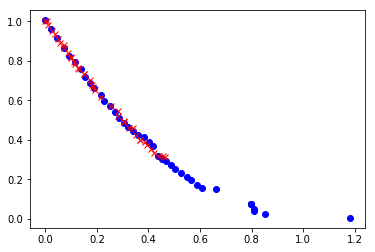

In [20]:
plt.plot(res_1,res_2,'bo')
plt.plot(nsga_x,nsga_y,'rx')
plt.show()

In [21]:
con_1 = np.array([cf6.const(c)[0] for c in f_cf6_3])
con_2 = np.array([cf6.const(c)[1] for c in f_cf6_3])

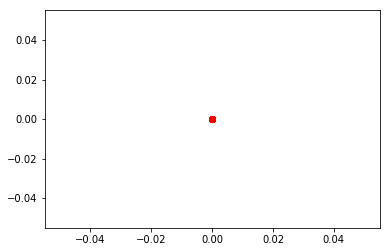

In [22]:
plt.plot(con_1,con_2,'ro')
plt.show()